<a href="https://colab.research.google.com/github/azahrp/data-analysis/blob/main/PENERAPAN_MODUL_4_%26_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("/content/seattle-weather.csv")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


# **MODUL 4**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
data = data.fillna('')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

#Menggunakan LabelEncoder untuk mengkodekan kolom
data['date'] = label_encoder.fit_transform(data['date'])
data['precipitation'] = label_encoder.fit_transform(data['precipitation'])
data['temp_max'] = label_encoder.fit_transform(data['temp_max'])
data['temp_min'] = label_encoder.fit_transform(data['temp_min'])
data['wind'] = label_encoder.fit_transform(data['wind'])
data.head()

#pengubahan data dri string ke integer

,date,precipitation,temp_max,temp_min,wind,weather
0,0,0,25,30,43,drizzle
1,1,43,21,26,41,rain
2,2,3,23,34,19,rain
3,3,74,24,31,43,rain
4,4,5,18,26,57,rain


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1461 non-null   int64 
 1   precipitation  1461 non-null   int64 
 2   temp_max       1461 non-null   int64 
 3   temp_min       1461 non-null   int64 
 4   wind           1461 non-null   int64 
 5   weather        1461 non-null   object
dtypes: int64(5), object(1)
memory usage: 68.6+ KB


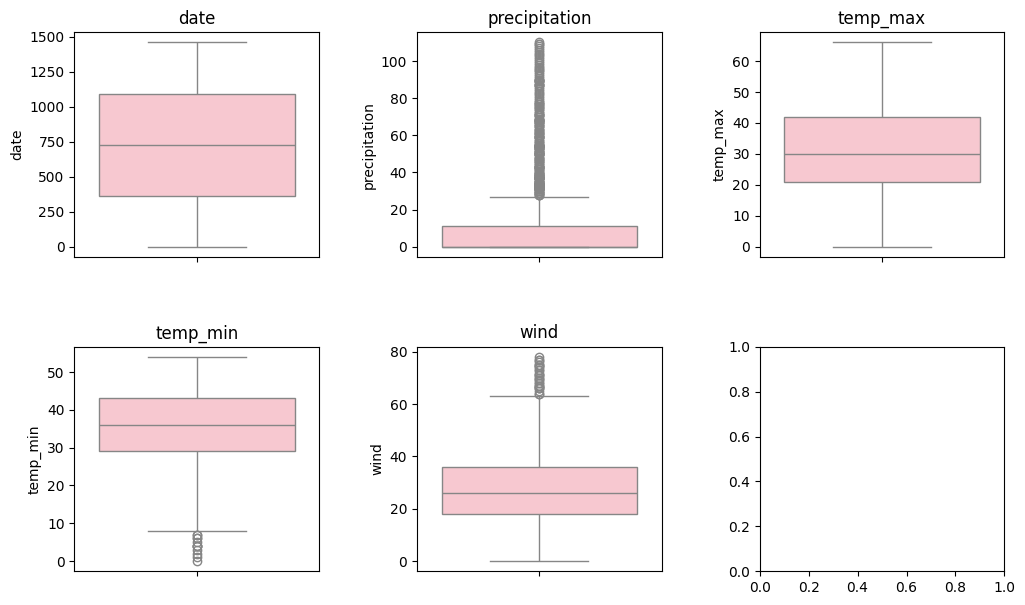

In [ ]:
def box_plot(data):
    # Variabel yang akan divisualisasikan
    variables = ['date',	'precipitation',	'temp_max',	'temp_min',	'wind']

    # Membuat figure dan axes untuk subplot
    fig, axes = plt.subplots(2, 3, figsize=(12, 7))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Atur jarak antar subplot

    # Iterasi melalui setiap variabel dan buat boxplot
    for i, var in enumerate(variables):
        row, col = i // 3, i % 3  # Tentukan posisi subplot
        sns.boxplot(y=var, data=data, color="pink", ax=axes[row, col])
        axes[row, col].set_title(var)  # Tambahkan judul untuk setiap plot

    # Tampilkan plot
    plt.show()

# Memanggil fungsi box_plot dengan data contoh
box_plot(data)

#mencari outlier/data yang melebihi range/standar

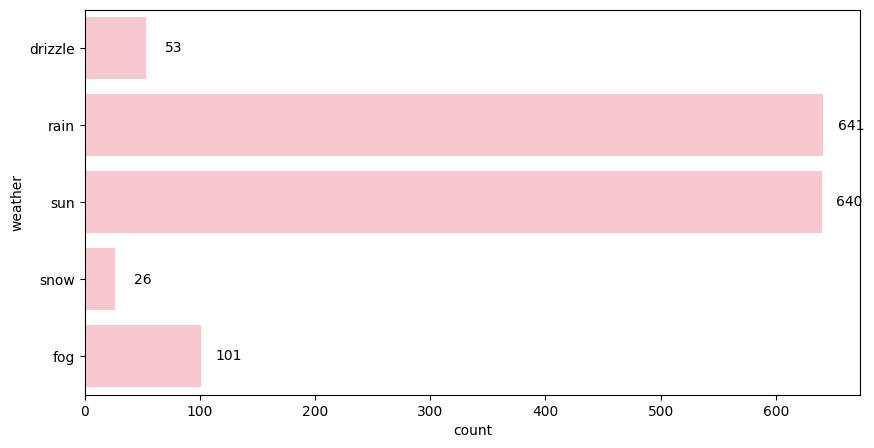

In [ ]:
# Atur ukuran canvas
plt.figure(figsize=(10,5))

# Buat countplot dengan orientasi horizontal
plot = sns.countplot(y='weather', data=data, color='pink')

# Menambahkan label pada masing-masing bar
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width(), p.get_y() + p.get_height() /2),
                  ha = 'center', va = 'center',
                  xytext = (20,0),
                  textcoords = 'offset points')
# Menampilkan plot
plt.show()

#penyebaran data bukan angka

<Axes: >

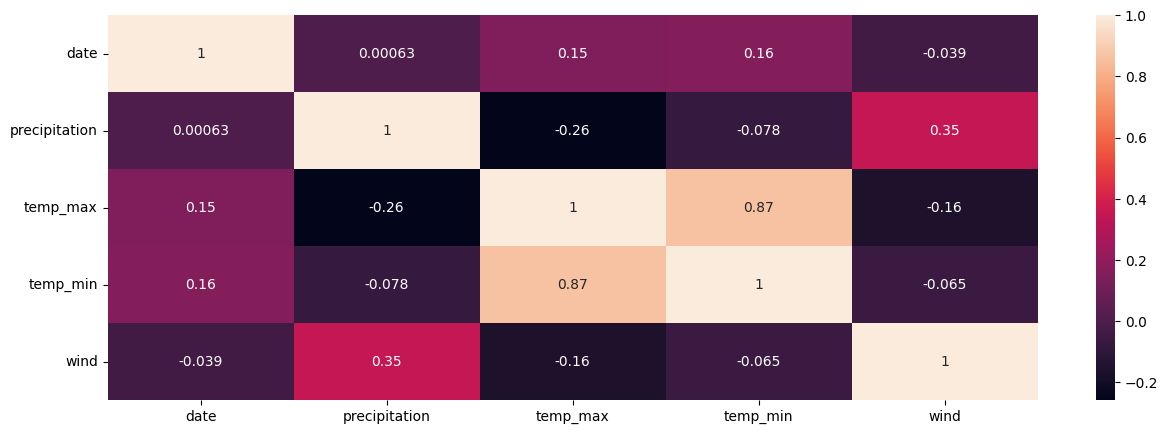

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 5))
sns.heatmap(numeric_data.corr(), annot=True)

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

#Menggunakan LabelEncoder untuk mengkodekan kolom
data['weather'] = label_encoder.fit_transform(data['weather'])
data.head()

#pengubahan data dri string ke integer

,date,precipitation,temp_max,temp_min,wind,weather
0,0,0,25,30,43,0
1,1,43,21,26,41,2
2,2,3,23,34,19,2
3,3,74,24,31,43,2
4,4,5,18,26,57,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   date           1461 non-null   int64
 1   precipitation  1461 non-null   int64
 2   temp_max       1461 non-null   int64
 3   temp_min       1461 non-null   int64
 4   wind           1461 non-null   int64
 5   weather        1461 non-null   int64
dtypes: int64(6)
memory usage: 68.6 KB


In [ ]:
#Variabel x
X = data[['precipitation', 'temp_max',	'temp_min',	'wind',	'date']]

#Variabel y
y = data['weather']

#membagi antara dua variabel yaitu x dan y

In [ ]:
#standarisasi
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
hasil_sc = sc.fit_transform(X)
hasil_sc

array([[-0.50442671, -0.49895498, -0.59498305,  1.02573546, -1.73086569],
       [ 1.48787804, -0.80162187, -1.01644741,  0.88543686, -1.72849464],
       [-0.36542871, -0.65028842, -0.17351869, -0.65784775, -1.72612359],
       ...,
       [-0.50442671, -1.25562222, -1.43791177, -0.44739985,  1.72612359],
       [-0.50442671, -1.48262239, -1.85937613,  0.11379455,  1.72849464],
       [-0.50442671, -1.48262239, -2.28084049,  0.18394385,  1.73086569]])

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
# Menerapkan regresi linier sederhana
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Memprediksi nilai y
y_pred = regressor.predict(x_test)

In [ ]:
coef_df = pd.DataFrame (regressor.coef_, X.columns, columns=['Coefficient'])
print("Intercept:", regressor.intercept_) #intercept = titik potong dengan sumbu y
print(coef_df)

Intercept: 2.8182050906228424
               Coefficient
precipitation    -0.009873
temp_max          0.061642
temp_min         -0.060616
wind              0.005534
date              0.000125


In [ ]:
from sklearn.linear_model import Ridge
# Inisialisasi model Ridge Regression
ridge_model = Ridge(alpha=5.0)  # alpha adalah parameter regularisasi
ridge_model.fit(x_train, y_train)

Ridge(alpha=5.0)

In [ ]:
# Memprediksi nilai y
y_pred1 = ridge_model.predict(x_test)

In [ ]:
# Mendapatkan koefisien dari model
coefficients = ridge_model.coef_

# Menampilkan koefisien untuk setiap variabel
for i, column_name in enumerate(X.columns):
  print(f'{column_name}: {coefficients[i]}')

precipitation: -0.009874697213452374
temp_max: 0.06162465544174236
temp_min: -0.06059214254112232
wind: 0.005533304528525992
date: 0.00012483066756743754


In [ ]:
from sklearn.linear_model import Lasso
# Inisialisasi model Lasso Regression
lasso_model = Lasso(alpha=5.0) #Anda dapat menyesuaikan nilai alpha
lasso_model.fit(x_train, y_train)

Lasso(alpha=5.0)

In [ ]:
#Membuat prediksi menggunakan model yang dilatih
y_pred2 = lasso_model.predict(x_test)

In [ ]:
# Mendapatkan koefisien dari model
coefficients = lasso_model.coef_

# Menampilkan koefisien untuk setiap variabel
for i, column_name in enumerate(X.columns):
  print(f'{column_name}: {coefficients[i]}')

precipitation: -0.005428162962267621
temp_max: 0.0
temp_min: 0.0
wind: -0.0
date: 0.00015373315801577302


In [ ]:
# Hitung MAE
import numpy as np
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae) # mae untuk mengetahui seberapa besar kesalahan prediksi secara umum

Mean Absolute Error (MAE): 0.8299347111858204


In [ ]:
# Hitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape) #sama kaya mae cuma dalam bentuk persentase

Mean Absolute Percentage Error (MAPE): inf


In [ ]:
# Hitung MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse) #sama kaya sebelumnya cuma dalam bentuk kuadrat

Mean Squared Error (MSE): 1.0799272404723095


In [ ]:
#Hitung RMSE
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse) #dalam satuan yang sama dengan data asli

Root Mean Squared Error (RMSE): 1.0391954775076293


In [ ]:
#Hitung R2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2) # cara untuk mengukur seberapa baik model prediksi kita sesuai dengan data yang sebenarnya

R-squared (R2) Score: 0.22772635693641463


In [ ]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,0,0,25,30,43,0
1,1,43,21,26,41,2
2,2,3,23,34,19,2
3,3,74,24,31,43,2
4,4,5,18,26,57,2
...,...,...,...,...,...,...
1456,1456,34,10,24,25,2
1457,1457,6,11,24,9,2
1458,1458,0,15,22,22,1
1459,1459,0,12,18,30,4


# **KNN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("/content/seattle-weather.csv")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

#Menggunakan LabelEncoder untuk mengkodekan kolom
data['date'] = label_encoder.fit_transform(data['date'])
data['precipitation'] = label_encoder.fit_transform(data['precipitation'])
data['temp_max'] = label_encoder.fit_transform(data['temp_max'])
data['temp_min'] = label_encoder.fit_transform(data['temp_min'])
data['wind'] = label_encoder.fit_transform(data['wind'])
data.head()

#pengubahan data dri string ke integer

,date,precipitation,temp_max,temp_min,wind,weather
0,0,0,25,30,43,drizzle
1,1,43,21,26,41,rain
2,2,3,23,34,19,rain
3,3,74,24,31,43,rain
4,4,5,18,26,57,rain


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1461 non-null   int64 
 1   precipitation  1461 non-null   int64 
 2   temp_max       1461 non-null   int64 
 3   temp_min       1461 non-null   int64 
 4   wind           1461 non-null   int64 
 5   weather        1461 non-null   object
dtypes: int64(5), object(1)
memory usage: 68.6+ KB


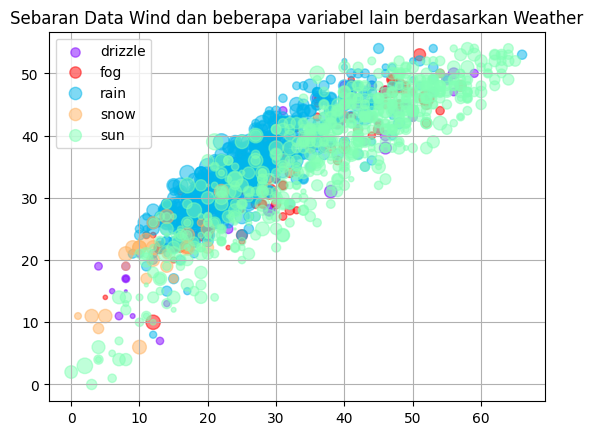

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()


# Membuat daftar warna acak untuk setiap weather
weather_unik = data['weather'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(weather_unik)))

# Menggambar scatter plot
for weather, d in data.groupby('weather'):
    warna = colors[np.where(weather_unik == weather)[0][0]]  # Pilih warna acak sesuai dengan weather
    ax.scatter(d['temp_max'],
               d['temp_min'],
               s=d['wind']*2,
               c=[warna],
               marker='o',
               alpha=0.5,
               label=str(weather))

plt.legend(loc='upper left')
plt.title('Sebaran Data Wind dan beberapa variabel lain berdasarkan Weather')
plt.grid(True)
plt.show()


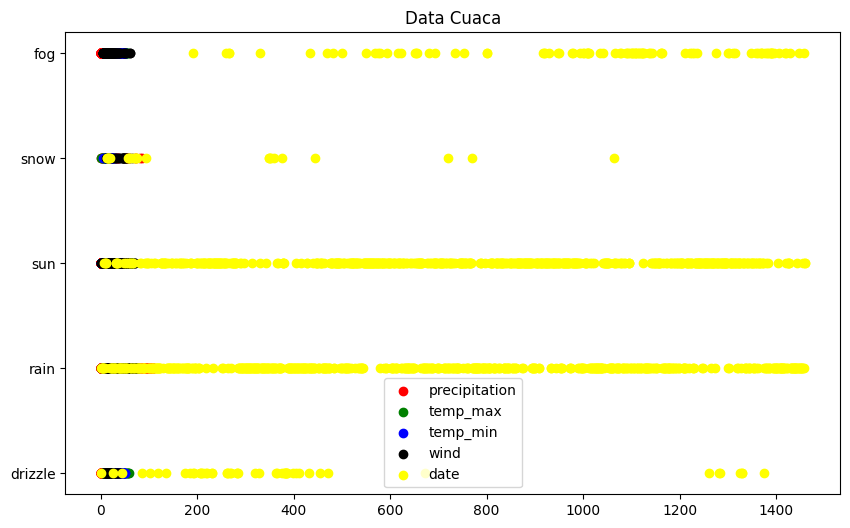

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot untuk melihat hubungan antara penjualan global dan penjualan di wilayah lainnya
plt.figure(figsize=(10, 6))
plt.scatter(data['precipitation'], data['weather'], color='red', label='precipitation')
plt.scatter(data['temp_max'], data['weather'], color='green', label='temp_max')
plt.scatter(data['temp_min'], data['weather'], color='blue', label='temp_min')
plt.scatter(data['wind'], data['weather'], color='black', label='wind')
plt.scatter(data['date'], data['weather'], color='yellow', label='date')
plt.title('Data Cuaca')
plt.legend()
plt.show()

In [ ]:
import numpy as np

X_train = np.array(data[['precipitation', 'temp_max',	'temp_min',	'wind',	'date']])
y_train = np.array (data['weather'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[   0   25   30   43    0]
 [  43   21   26   41    1]
 [   3   23   34   19    2]
 ...
 [   0   15   22   22 1458]
 [   0   12   18   30 1459]
 [   0   12   14   31 1460]]

y_train: ['drizzle' 'rain' 'rain' ... 'fog' 'sun' 'sun']


In [ ]:
# Inisialisasi LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
print(f'y_train:\n{y_train}')

#pengubahan data dri string ke integer

y_train:
[0 2 2 ... 1 4 4]


In [ ]:
import numpy as np

# Membentuk kembali y_train menjadi array 2 dimensi dengan satu kolom
y_train_reshaped = y_train.reshape(-1, 1)

# Menampilkan hasil
print("y_train yang sudah diubah:\n", y_train_reshaped)

y_train yang sudah diubah:
 [[0]
 [2]
 [2]
 ...
 [1]
 [4]
 [4]]


In [ ]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 2 2 ... 1 4 4]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

K = 9
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
precipitation_new = 5.0
temp_max_new = 11.7
temp_min_new = 5.8
wind_new = 12.0
date_new = 10
X_new = np.array ([precipitation_new, temp_max_new,	temp_min_new,	wind_new,	date_new]).reshape(1,-1)
X_new

array([[ 5. , 11.7,  5.8, 12. , 10. ]])

In [ ]:
y_new = model.predict(X_new)
y_new

array([2])

In [ ]:
le.inverse_transform(y_new)

array(['rain'], dtype=object)

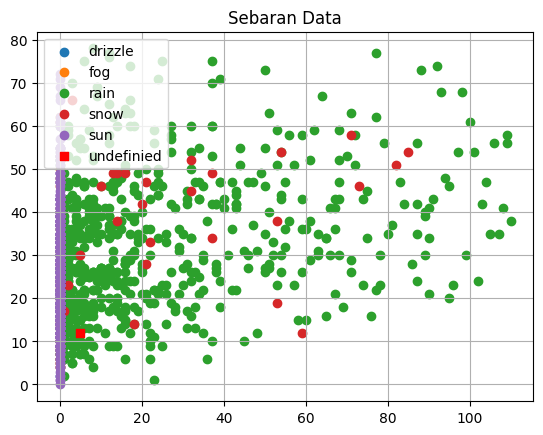

In [ ]:
fig, ax = plt.subplots()
for weather, d in data.groupby('weather'):
  ax.scatter(d['precipitation'], d['wind'], label=weather)

plt.scatter (precipitation_new,
             wind_new,
             marker='s',
             color='red',
             label='undefinied')

plt.legend (loc='upper left')
plt.title('Sebaran Data')
plt.grid(True)
plt.show()

In [ ]:
undefinied = np.array([precipitation_new, temp_max_new,	temp_min_new,	wind_new,	date_new])
undefinied

array([ 5. , 11.7,  5.8, 12. , 10. ])

In [ ]:
X_train

array([[   0,   25,   30,   43,    0],
       [  43,   21,   26,   41,    1],
       [   3,   23,   34,   19,    2],
       ...,
       [   0,   15,   22,   22, 1458],
       [   0,   12,   18,   30, 1459],
       [   0,   12,   14,   31, 1460]])

In [ ]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean (undefinied, d) for d in X_train]
data_jarak

[42.99453453638032,
 53.48392281798335,
 32.2479456710036,
 80.97734251011205,
 50.087223919878014,
 21.389950911584627,
 22.559476944291063,
 22.954955891920157,
 33.330616555953476,
 24.29259146324245,
 37.109702235399304,
 11.014989786649826,
 8.095060222135473,
 42.00392838771155,
 24.444426767670375,
 35.748146805114246,
 51.08551653844757,
 77.01772523257227,
 55.87065419341356,
 50.6984220661748,
 68.72066646941079,
 43.358159555036465,
 29.88193434167206,
 51.696518258002634,
 54.285633458586446,
 42.1963268543602,
 18.496756472419698,
 24.85417469963547,
 94.53110599162585,
 48.80092212243535,
 40.899021993196854,
 57.92348401123675,
 31.11800122115815,
 50.570050425128116,
 47.4397512641034,
 37.206585438602126,
 50.6036559944042,
 57.45894186286413,
 39.944085920195995,
 43.45952139635226,
 45.141222845642986,
 44.31399327526238,
 40.59224063783619,
 56.939704951817234,
 41.31742973612952,
 39.081069586182004,
 42.25316556188424,
 77.59594061547293,
 79.44262080269004,
 53.6

In [ ]:
data['jarak'] = data_jarak
data.sort_values(['jarak'])

,date,precipitation,temp_max,temp_min,wind,weather,jarak
12,12,0,11,11,9,sun,8.095060
11,11,0,13,15,15,sun,11.014990
26,26,0,14,13,10,drizzle,18.496756
5,5,10,10,25,18,rain,21.389951
6,6,0,15,26,19,rain,22.559477
...,...,...,...,...,...,...,...
1456,1456,34,10,24,25,rain,1446.464701
1457,1457,6,11,24,9,rain,1447.118077
1458,1458,0,15,22,22,fog,1448.137538
1459,1459,0,12,18,30,sun,1449.171808


In [ ]:
X_test = np.array([[6.12, 10, 11.7, 8.4, 3 ], [12.3, 8, 6.5, 9, 7], [10, 10, 3.2, 6.7, 1]])
y_test = le.transform(np.array(['snow', 'rain', 'sun'])).flatten()

print(f'X_test: \n{X_test}\n')
print(f'y_test: \n{y_test}')

X_test: 
[[ 6.12 10.   11.7   8.4   3.  ]
 [12.3   8.    6.5   9.    7.  ]
 [10.   10.    3.2   6.7   1.  ]]

y_test: 
[3 2 4]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.3333333333333333


In [ ]:
from sklearn.metrics import precision_score

# Menghitung presisi dengan menangani pembagian dengan nol
prec = precision_score(y_test, y_pred, average=None, zero_division=1)
print(f'Precission: {prec}')

Precission: [0.33333333 1.         1.        ]
